In [1]:
#2017年の中学生のデータを取り込み
import pandas as pd
df = pd.read_csv('pref_2017.csv')
df.head()

,2017,f_rate,gaku,life,sports,morals,jison
0,Hokkaido,3.39,65.0,5.10,40.70,4.9,5.1
1,Aomori,2.99,66.3,5.25,42.28,5.3,5.4
2,Iwate,2.56,63.8,5.20,44.22,5.5,5.1
3,Miyagi,4.34,65.0,5.35,42.01,4.8,5.0
4,Akita,2.45,70.0,6.15,44.22,5.9,5.9


In [2]:
#都道府県と不登校率の列を削除
df_1 = df.drop(['2017', 'f_rate'], axis = 1)
df_1.head()

,gaku,life,sports,morals,jison
0,65.0,5.10,40.70,4.9,5.1
1,66.3,5.25,42.28,5.3,5.4
2,63.8,5.20,44.22,5.5,5.1
3,65.0,5.35,42.01,4.8,5.0
4,70.0,6.15,44.22,5.9,5.9


In [3]:
#データの標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df_1)

In [4]:
#クラスを3つに指定してクラスタリングを実行
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state = 0)
model.fit(sc_df)
clusters = model.labels_
clusters

/Users/yumikomabuchi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int32)

In [5]:
#tsneの実行
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0).fit_transform(sc_df)

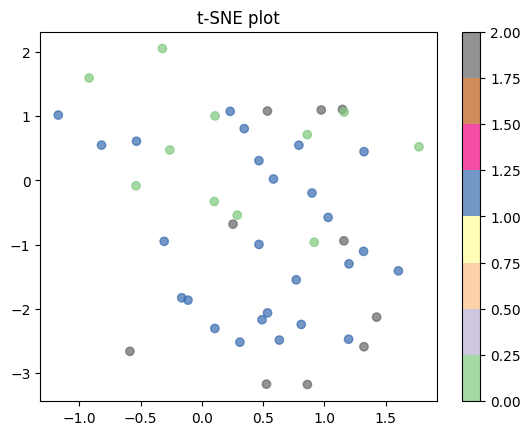

In [7]:
import matplotlib.pyplot as plt
#不登校率によって3つの色分けを作る(低いグループ10県=0, 高いグループ10県=2, それ以外の県=1 )
df.loc[df['f_rate']<=2.81, 'a'] = 0
df.loc[(df['f_rate']>2.81) & (df['f_rate']<3.41), 'a'] = 1
df.loc[df['f_rate']>=3.41, 'a'] = 2
A = df['a']
#不登校率による3つの色分けでプロットしてみる
plt.scatter(tsne[:, 0], tsne[:, 1],cmap='Accent', c = A, alpha=0.7)
plt.title('t-SNE plot')
plt.colorbar()
plt.show()

In [8]:
#別の都道府県データを読み込み
df_tmp = pd.read_csv('pre_2017_tmp.csv')

#不登校率の列を削除
df_tmp_1 = df_tmp.drop(['2017', 'f_rate'], axis = 1)
df_tmp_1.head()

,stu_per_tch_jun,rate_OII_jun
0,11.01,0.05
1,10.78,0.03
2,10.82,0.03
3,12.42,0.02
4,10.51,0.00


In [9]:
#データの標準化
sc_df_1 = sc.fit_transform(df_tmp_1)

In [10]:
#PCAでクラスタリング
model = KMeans(n_clusters = 3, random_state = 0)
model.fit(sc_df_1)
clusters_1 = model.labels_
clusters_1

/Users/yumikomabuchi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int32)

In [11]:
#tsneの実行
tsne_1 = TSNE(random_state=0).fit_transform(sc_df_1)


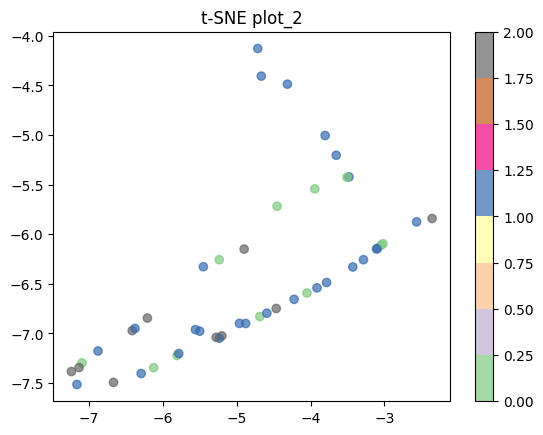

In [12]:
#不登校率にる3つの色分けでプロットして見る
plt.scatter(tsne_1[:, 0], tsne_1[:, 1],cmap='Accent', c = A, alpha=0.7)
plt.title('t-SNE plot_2')
plt.colorbar()
plt.show()